<img src="images/elo-tel.png" alt="" width="130px" align="left"/>
<img src="images/utfsm.png" alt="" width="150px" align="right"/>
<br/>
<div align="center">
<h2>TEL-101 Iniciación a la Programación</h2><br/>
<h1>Ejercicios Matplotlib</h1>
<br/><br/>
Dr. Nicolás Gálvez R.<br/>
nicolas.galvez@usm.cl<br/><br/>
Ingeniería Civil Telemática<br/>
Departamento de Eléctronica<br/>
Universidad Técnica Federico Santa María
</div>

# Ejercicios

**1.** Cree una **función** `info_temp(archivo)` que lea de un `archivo` de temperaturas históricas pasado como parámetro (el archivo a trabajar se llama `temperaturas.txt`) y retorne una **lista con dos listas**: una de años y otra de temperaturas. La posición en la primera lista estará relacionada con la misma posición en la segunda.

Luego, utilice la salida de la función para graficar:
1. La información de la **temperatura media global** en grados Celcius, **en cada década**. 
2. La diferencia de temperatura entre una década y la siguiente.

Ambas gráficas deben quedar en la **misma figura**, la primera arriba y la segunda abajo. Preocúpese de la estética.

**2.** En el archivo `notas-genero.csv`, se encuentran almacenados los nombres, nota final y género de los estudiantes que han cursado una asignatura. Realice lo siguiente (preocúpese de la estética):
1. Cree una función `leer(archivo)` que lea de un `archivo` (nombre del archivo pasado como parámetro), y extraiga y retorne toda la información necesaria para generar los gráficos siguientes.
1. Con la información extraída, genere un **histograma** de las notas del curso, mostrando en texto en el gráfico la media y la desviación estándar (use la función `mean()` y `std()` de la biblioteca `numpy` que entrega la media y la desviación estándar de una sequencia de datos, respectivamente).
1. Ordene las notas (recomendamos el uso de `sort()` de la biblioteca `numpy`) y genere **un gráfico** (el que ud estime conveniente) de las notas ordenadas de menor a mayor.
1. Genere **dos gráficos de torta** en una misma figura, mostrando el porcentaje de hombres y mujeres en el curso a la izquierda, y a la derecha el porcentaje de aprobados y reprobados.

**3.** El *caracol de Pascal* es una función que puede ser parametrizada por las ecuaciones:
- $r = r_0 + \cos \theta$
- $x = r \cos \theta$
- $y = r \cos \theta$

Cuando $r_0 = 1$, esta curva es llamada **cardioide**. Utilizando esta definición, y sus conocimientos en `matplotlib`, genere una animación que vaya agregando progresivamente curvas de este tipo, modificando $r_0$ para el intervalo $[0, 2]$. Asegúrese de utilizar suficientes puntos para que la curva se vea suave.

*Hint: `fig.canvas.draw()` dibuja las modificaciones a una figura, `fig.canvas.flush_events()` hace que ocurran todos los cambios, `sleep(segundos)` de la biblioteca `time` detiene la ejecución del programa de acuerdo a los `segundos` especificados (puede ser menor que 1 también).*

**4.** Utilizando pyplot, genere el gráfico para las siguientes curvas:
- $f(x) = e^{-x/10} \sin(\pi x)$
- $g(x) = x e^{-x/3}$

en el intervalo $[0,10]$. Incluya etiquetas para los ejes $x$ e $y$, y una **leyenda** explicando qué curva pertenece a cada ecuación.

*Hint: investigue el uso del método `ax.legend()`, donde ax es un `subplot` de una `figure`.*

# Soluciones

**1.** Cree una **función** `info_temp(archivo)` que lea de un `archivo` de temperaturas históricas pasado como parametro (el archivo a trabajar se llama `temperaturas.txt`) y retorne una **lista con dos listas**: una de años y otra de temperaturas. La posición en la primera lista estará relacionada con la misma posición en la segunda.

Luego, utilice la salida de la función para graficar:
1. La información de la **temperatura media global** en grados Celcius, **en cada década**.
2. La diferencia de temperatura entre una década y la siguiente.

Ambas gráficas deben quedar en la **misma figura**, la primera arriba y la segunda abajo. Preocúpese de la estética.

In [1]:
#1. Función:
def LeeTemperaturas(archivo):
    try:
        f=open(archivo, 'r')
    except IOError:
        print("Error: No se puede abrir para lectura: temperaturas.txt")
    else:
        temp = []
        annos = []
        for line in f: #Lee una línea a la vez
            fields = line.strip().split()
            annos.append(int(fields[0]))
            temp.append(float(fields[1]))
        f.close()
        return [annos, temp]

In [2]:
#1. Desarrollo: Parte 1
import matplotlib.pyplot as plt

[a, t] = LeeTemperaturas("temperaturas.txt")
if len(a) == 0:
    raise ValueError("Lista Vacia, verifique que temperaturas.txt tenga contenido")

miny = maxy = t[0]
diff = []
dlabels = []
for i in range(1, len(t)):
    if t[i] < miny:
        miny = t[i]
    if t[i] > maxy:
        maxy = t[i]
    diff.append(t[i] - t[i-1])
    dlabels.append(a[i])

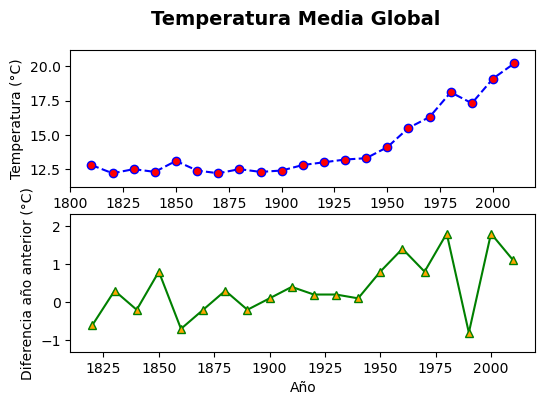

In [3]:
#1. Desarrollo: Parte 2
fig = plt.figure(dpi=100)
fig.suptitle('Temperatura Media Global', fontsize=14,
             fontweight='bold')

ax1 = fig.add_subplot(211) #Gráfico de Año vs Temperatura 
ax1.set_xlabel('Año')
ax1.set_ylabel('Temperatura (°C)')
ax1.plot(a, t, 'o--',
         color='blue',
         markerfacecolor='red')
ax1.axis([a[0]-10, a[len(a)-1]+10, miny-1, maxy+1])

ax2 = fig.add_subplot(212) #Gráfico de Año vs Diferencia de Temperatura 
ax2.set_xlabel('Año')
ax2.set_ylabel('Diferencia año anterior (°C)')
ax2.plot(dlabels, diff, '^-',
         color='green',
         markerfacecolor='orange')
ax2.axis([dlabels[0]-10, dlabels[len(dlabels)-1]+10, min(diff)-0.5, max(diff)+0.5])

plt.show()

**2.** En el archivo `notas-genero.csv`, se encuentran almacenados los nombres, nota final y genero de los estudiantes que han cursado una asignatura. Realice lo siguiente (preocúpese de la estética):
1. Cree una función `leer(archivo)` que lea de un `archivo` (nombre del archivo pasado como parámetro), y extraiga y retorne toda la información necesaria para generar los gráficos siguientes.
1. Con la información extraída, genere un **histograma** de las notas del curso, mostrando en texto en el gráfico la media y la desviación estándar ((use la función `mean()` y `std()` de la biblioteca `numpy` que entrega la media y la desviación estándar de una sequencia de datos, respectivamente).
1. Ordene las notas (recomendamos el uso de `sort()` de la biblioteca `numpy`) y genere **un gráfico** (el que ud estime conveniente) de las notas ordenadas de menor a mayor.
1. Genere **dos gráficos de torta** en una misma figura, mostrando el porcentaje de hombres y mujeres en el curso a la izquierda, y a la derecha el porcentaje de aprobados y reprobados.

In [2]:
#2. a) Función (Nombres, nota y genero):
def LeeNotas(archivo):
    try:
        f=open(archivo, 'r')
    except IOError:
        print("Error: No se puede abrir para lectura: notas-generp.csv")
    else:
        notas = []
        genero = []
        primera = True
        for line in f: #Lee una línea a la vez
            if primera: #Ignora primera línea
                primera = False
            else:
                fields = line.strip().split("\t") 
                #Nombres son irrelevantes (se ignoran)
                notas.append(int(fields[1]))
                genero.append(fields[2].strip())
        f.close()
        return [notas, genero]

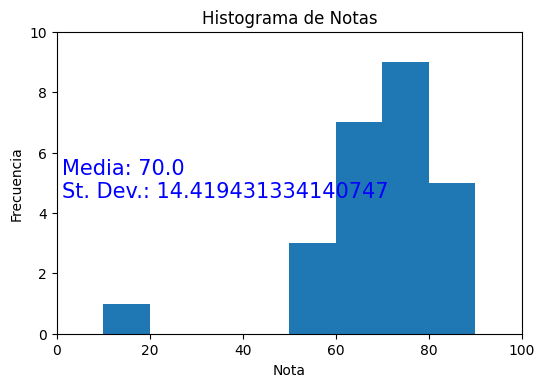

In [11]:
#2. Desarrollo
#Parte 1: Lectura Archivo
import matplotlib.pyplot as plt
import numpy as np

[notas, sexo] = LeeNotas("notas-genero.csv")
#print(LeeNotas("notas-genero.csv"))

# Parte2: Histograma
figh = plt.figure(dpi=100)
axh = figh.add_subplot(1,1,1)
(n,b,s) = axh.hist(notas, range(0,101,10))

axh.text(1, max(n)/2, 'Media: ' + str(np.mean(notas))
         + '\nSt. Dev.: ' + str(np.std(notas)),
        color='blue', fontsize=15)

axh.set_xlabel('Nota')
axh.set_ylabel('Frecuencia')
axh.set_title('Histograma de Notas')
axh.axis([0,100,0,max(n)+1])
plt.show() #en su programa pueden usar figh.show()

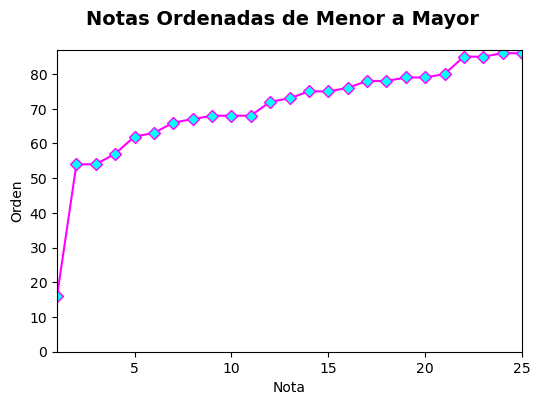

In [6]:
# Parte 3: Notas ordenadas
ordenadas = np.sort(notas)
fign = plt.figure(dpi=100)
fign.suptitle('Notas Ordenadas de Menor a Mayor', fontsize=14,
             fontweight='bold')
axn = fign.add_subplot(111)
axn.set_xlabel('Nota')
axn.set_ylabel('Orden')
axn.plot(range(1,len(notas)+1), ordenadas, 'D-',
         color='magenta',
         markerfacecolor='cyan')
axn.axis([1, len(notas), 0, max(notas)+1])
plt.show() #en su programa pueden usar fign.show()

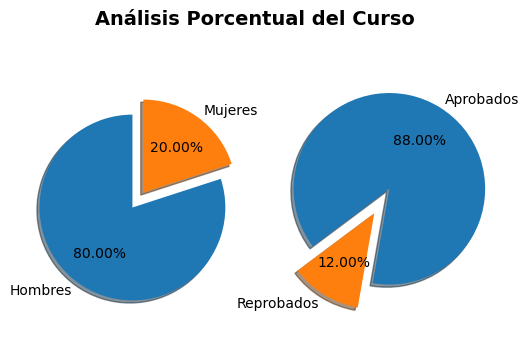

In [7]:
# Parte 4: Gráficos de torta
F = 0
for s in sexo:
    if s == "F":
        F += 1
M = len(sexo) - F

R = 0
for n in notas:
    if n < 55:
        R += 1
A = len(notas) - R

etiq = ['Hombres', 'Mujeres']
tama = [M, F]
expl = (0, 0.2)
figp = plt.figure(dpi=100)
figp.suptitle('Análisis Porcentual del Curso', fontsize=14,
             fontweight='bold')
axp1 = figp.add_subplot(121)
axp1.pie(tama, explode=expl, labels=etiq,
        autopct='%1.2f%%', #Formato de porcentaje (2 decimales) 
        shadow=True, #con sombra
        startangle=90) #ángulo de partida
axp1.axis('equal')  # Igual tasa de aspecto asegura
                    # que gráfico sea dibujado como círculo.
etiq2 = ['Aprobados', 'Reprobados']
tama2 = [A, R]
expl2 = (0, 0.3)
axp2 = figp.add_subplot(122)
axp2.pie(tama2, explode=expl2, labels=etiq2,
        autopct='%1.2f%%', #Formato de porcentaje (2 decimales) 
        shadow=True, #con sombra
        startangle=260) #ángulo de partida
axp2.axis('equal')  # Igual tasa de aspecto asegura
                    # que gráfico sea dibujado como círculo.
plt.show() #en su programa pueden usar figp.show()

**3.** El *caracol de Pascal* es una función que puede ser parametrizada por las ecuaciones:
- $r = r_0 + \cos \theta$
- $x = r \cos \theta$
- $y = r \cos \theta$

Cuando $r_0 = 1$, esta curva es llamada **cardioide**. Utilizando esta definición, y sus conocimientos en `matplotlib`, genere una animación que vaya agregando progresivamente curvas de este tipo, modificando $r_0$ para el intervalo $[0, 2]$. Asegúrese de utilizar suficientes puntos para que la curva se vea suave.

*Hint: `fig.canvas.draw()` dibuja las modificaciones a una figura, `fig.canvas.flush_events()` hace que ocurran todos los cambios, `sleep(segundos)` de la biblioteca `time` detiene la ejecución del programa de acuerdo a los `segundos` especificados (puede ser menor que 1 también).*

<IPython.core.display.Javascript object>


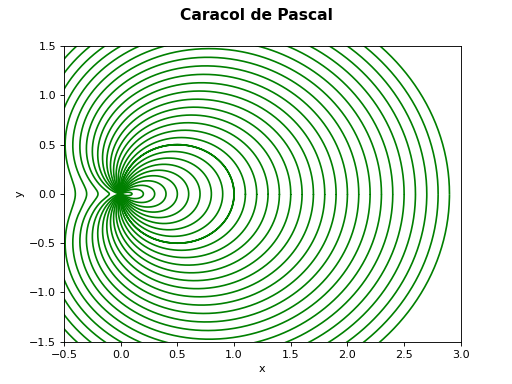

In [1]:
#Ejercicio 3:
%matplotlib notebook

import matplotlib.pyplot as plt
import time
import numpy as np


def genCaracolPascal(theta, r0):
    r = r0 + np.cos(theta)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return [x,y]

theta = np.arange(0, 2*np.pi,2*np.pi/1000.0)
fig1 = plt.figure()
fig1.suptitle('Caracol de Pascal', fontsize=14,
             fontweight='bold')
ax1 = fig1.add_subplot(111)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.axis([-0.5, 3, -1.5, 1.5])
#fig1.legend()
fig1.show()

r0 = 0
while r0 <= 2:
    [x,y] = genCaracolPascal(theta, r0)
    ax1.plot(x,y,'g-', label="r0="+str(r0))
    r0 += 0.1
    
    
    fig1.canvas.draw()
    fig1.canvas.flush_events()
    
    time.sleep(0.1)

**4.** Utilizando pyplot, genere el gráfico para las siguientes curvas:
- $f(x) = e^{-x/10} \sin(\pi x)$
- $g(x) = x e^{-x/3}$ en el intervalo $[0,10]$.

Incluya etiquetas para los ejes $x$ e $y$, y una **leyenda** explicando qué curva pertenece a cada ecuación.

*Hint: investigue el uso del método `ax.legend()`, donde ax es un `subplot` de una `figure`.*

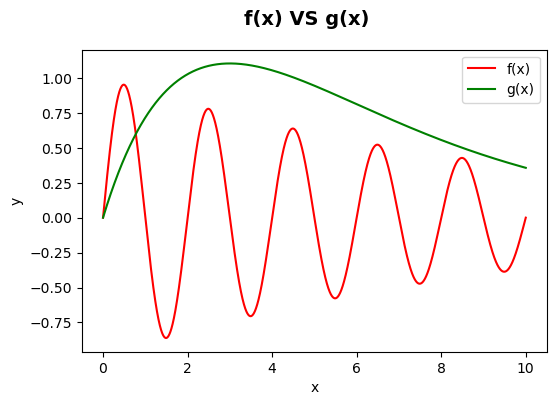

In [9]:
#Ejercicio 4:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 10.00001,0.001)
fig2 = plt.figure(dpi=100)
fig2.suptitle('f(x) VS g(x)', fontsize=14,
             fontweight='bold')
ax2 = fig2.add_subplot(111)
#Se etiqueta con keyword argument 'label':
ax2.plot(x, np.exp(-x/10)*np.sin(np.pi*x),'r-', label="f(x)")
ax2.plot(x, x*np.exp(-x/3),'g-', label="g(x)")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
# Activar legend (esto es nuevo):
ax2.legend()
plt.show()


In [13]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
#codigo extra, para que imagenes de matplotlib
#estén centradas en las diapositivas, ejecutar antes de lanzar los ejemplos.